<a href="https://colab.research.google.com/github/louisechilds/ADS2002-Catheter/blob/main/KMeans_Binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
RS=42#set random seed consistent
train=pd.read_csv('train.csv')
train_annot=pd.read_csv('train_annotations.csv')

In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
train=pd.read_csv('train.csv')
train_annot=pd.read_csv('train_annotations.csv')

In [ ]:
patients=train.groupby(['PatientID']).sum()

<AxesSubplot:title={'center':'Levels of catheter placement by type'}>

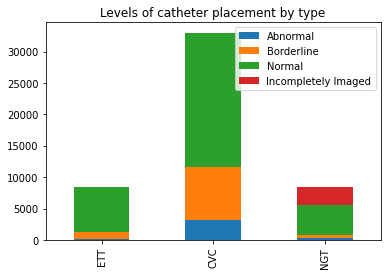

In [ ]:
sums=pd.DataFrame(patients.sum())
sums
graph_sums=pd.DataFrame({'ETT':[patients['ETT - Abnormal'].sum(),patients['ETT - Borderline'].sum(),patients['ETT - Normal'].sum(),0],
                         'CVC':[patients['CVC - Abnormal'].sum(),patients['CVC - Borderline'].sum(),patients['CVC - Normal'].sum(),0],
                         'NGT':[patients['NGT - Abnormal'].sum(),patients['NGT - Borderline'].sum(),patients['NGT - Normal'].sum(),patients['NGT - Incompletely Imaged'].sum()]})
graph_sums=graph_sums.transpose()
graph_sums=graph_sums.rename(columns={0:'Abnormal',1:'Borderline',2:'Normal',3:'Incompletely Imaged'})
graph_sums.plot.bar(stacked=True,title='Levels of catheter placement by type')

In [ ]:
import pandas as pd
import numpy as np
import os
import shutil
train=pd.read_csv('train.csv')
train_annot=pd.read_csv('train_annotations.csv')

In [ ]:
directory_path='/projects/sc73/ranzcr-clip-catheter-line-classification/train'

In [ ]:
#separate by normal or something else for each type of catheter
test_CVC=train[['StudyInstanceUID','CVC - Abnormal','CVC - Normal','CVC - Borderline']]
test_CVC=test_CVC.drop(test_CVC[(test_CVC['CVC - Abnormal'] == 0) & (test_CVC['CVC - Normal'] == 0) & (test_CVC['CVC - Borderline'] == 0)].index)
test_ETT=train[['StudyInstanceUID','ETT - Abnormal','ETT - Normal','ETT - Borderline']]
test_ETT=test_ETT.drop(test_ETT[(test_ETT['ETT - Abnormal'] == 0) & (test_ETT['ETT - Normal'] == 0) & (test_ETT['ETT - Borderline'] == 0)].index)
test_NGT=train[['StudyInstanceUID','NGT - Abnormal','NGT - Normal','NGT - Borderline','NGT - Incompletely Imaged']]
test_NGT=test_NGT.drop(test_NGT[(test_NGT['NGT - Abnormal'] == 0) & (test_NGT['NGT - Normal'] == 0) & (test_NGT['NGT - Borderline'] == 0) & (test_NGT['NGT - Incompletely Imaged']==0)].index)
test_NGT=test_NGT.drop(test_NGT[(test_NGT['NGT - Incompletely Imaged']==1)].index)

In [ ]:

def add_feature(df, folder):
    if 'image' not in df.columns:
        df['image'] = ''

    for i, row in df.iterrows():
        filename = row['StudyInstanceUID'] + '.jpg'
        image_path = os.path.join(folder, filename)
        image = Image.open(image_path).convert('L')  # Open and convert to grayscale
        image = np.array(image)
       #image = image.resize((300, 300))  # Resize to manageable dimensions
        df.at[i, 'image'] = image  # Set the 'image' column with the Pillow Image object

    return df

In [ ]:
def remove_suffix(text, suffix):
    """Remove the specified suffix from the given text."""
    if text.endswith(suffix):
        return text[:-len(suffix)]
    return text

Using just the first 750 images to try on kmeans

In [ ]:
from PIL import Image

In [ ]:
directory_files = os.listdir(directory_path)
for i in range(750):
    directory_files[i]=remove_suffix(directory_files[i], '.jpg')

cvc_images_train=test_CVC.loc[train['StudyInstanceUID'].isin(directory_files)]
ngt_images_train=test_NGT.loc[train['StudyInstanceUID'].isin(directory_files)]
ett_images_train=test_ETT.loc[train['StudyInstanceUID'].isin(directory_files)]
cvc=add_feature(cvc_images_train,directory_path)
ngt=add_feature(ngt_images_train,directory_path)
ett=add_feature(ett_images_train,directory_path)
#convert to binary datasets
cvc_binary_test=cvc[['CVC - Normal','StudyInstanceUID','image']]
ngt_binary_test=ngt[['NGT - Normal','StudyInstanceUID','image']]
ett_binary_test=ett[['ETT - Normal','StudyInstanceUID','image']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## CVC Binary Test

In [ ]:
cvc_binary_test

,CVC - Normal,StudyInstanceUID,image
11,1,1.2.826.0.1.3680043.8.498.84472839875948876829...,"[[26, 37, 78, 119, 130, 126, 122, 114, 89, 57,..."
13,1,1.2.826.0.1.3680043.8.498.71008408169501434503...,"[[81, 87, 102, 113, 100, 72, 52, 48, 36, 31, 2..."
66,1,1.2.826.0.1.3680043.8.498.33717345723466709327...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
67,1,1.2.826.0.1.3680043.8.498.26255946920569788246...,"[[10, 10, 10, 9, 9, 8, 8, 8, 6, 6, 6, 6, 6, 6,..."
124,1,1.2.826.0.1.3680043.8.498.41219045795159738970...,"[[3, 4, 5, 6, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6,..."
...,...,...,...
29978,1,1.2.826.0.1.3680043.8.498.64613994016358304616...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
29995,1,1.2.826.0.1.3680043.8.498.50146387142959002506...,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
30000,1,1.2.826.0.1.3680043.8.498.55109503616187115050...,"[[0, 1, 1, 1, 2, 6, 12, 16, 13, 11, 9, 9, 11, ..."
30056,0,1.2.826.0.1.3680043.8.498.88232185276535677583...,"[[3, 4, 6, 8, 9, 9, 8, 7, 5, 5, 6, 6, 6, 6, 5,..."


In [ ]:
shapes = []
for i in range(len(cvc_binary_test)):
  shapes.append(cvc_binary_test.iloc[i].iat[2].shape)
min(shapes)

(1758, 1804)

In [ ]:
new_cvc_binary = cvc_binary_test.copy()
new_cvc_binary['image'] = new_cvc_binary['image'].apply(lambda x: np.resize(x, min(shapes)))
flat_copy = new_cvc_binary.copy()
flat_copy['image'] = flat_copy['image'].apply(lambda x: np.array(x).flatten())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np

X = np.stack(flat_copy['image'].values)
Y = flat_copy['CVC - Normal']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the K-Means model on the training data
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit(X_train)

from sklearn.metrics import accuracy_score
preds = kmeans.predict(X_test)
print('Accuracy of KMeans is', np.round(accuracy_score(y_test, preds),3))

Accuracy of KMeans is 0.66


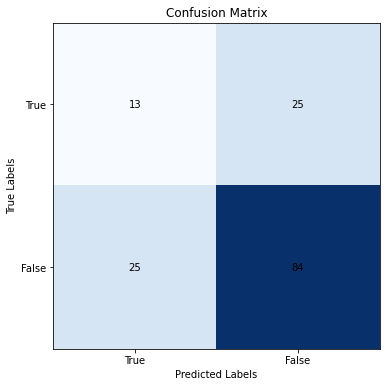

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.xticks([0, 1], ['True', 'False'])
plt.yticks([0, 1], ['True', 'False'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Display the annotations on the heatmap
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.show()

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, preds)
print("Recall:", recall)

Recall: 0.7706422018348624


## NGT Binary Test

In [ ]:
ngt_binary_test

,NGT - Normal,StudyInstanceUID,image
66,1,1.2.826.0.1.3680043.8.498.33717345723466709327...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
204,1,1.2.826.0.1.3680043.8.498.75289336873032144148...,"[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."
363,1,1.2.826.0.1.3680043.8.498.36885100611708351610...,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
370,1,1.2.826.0.1.3680043.8.498.61214074150651249100...,"[[2, 3, 4, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3,..."
592,1,1.2.826.0.1.3680043.8.498.12359997132910172428...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
...,...,...,...
28983,1,1.2.826.0.1.3680043.8.498.10857088120653277268...,"[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
28990,1,1.2.826.0.1.3680043.8.498.12986665324618114238...,"[[44, 44, 64, 83, 79, 73, 74, 72, 77, 76, 74, ..."
29463,1,1.2.826.0.1.3680043.8.498.10888207831037764542...,"[[48, 51, 72, 88, 87, 85, 87, 84, 86, 85, 84, ..."
29648,1,1.2.826.0.1.3680043.8.498.75845332040565870699...,"[[0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."


In [ ]:
shapes = []
for i in range(len(ngt_binary_test)):
  shapes.append(ngt_binary_test.iloc[i].iat[2].shape)
min(shapes)

new_ngt_binary = ngt_binary_test.copy()
new_ngt_binary['image'] = new_ngt_binary['image'].apply(lambda x: np.resize(x, min(shapes)))
flat_copy = new_ngt_binary.copy()
flat_copy['image'] = flat_copy['image'].apply(lambda x: np.array(x).flatten())

X = np.stack(flat_copy['image'].values)
Y = flat_copy['NGT - Normal']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the K-Means model on the training data
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit(X_train)

from sklearn.metrics import accuracy_score
preds = kmeans.predict(X_test)
print('Accuracy of KMeans is', np.round(accuracy_score(y_test, preds),3))

Accuracy of KMeans is 0.643


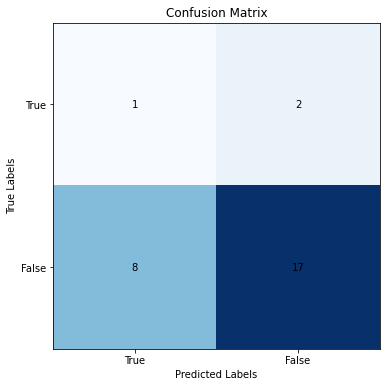

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.xticks([0, 1], ['True', 'False'])
plt.yticks([0, 1], ['True', 'False'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Display the annotations on the heatmap
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.show()

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, preds)
print("Recall:", recall)

Recall: 0.68


## ETT Binary Test

In [ ]:
ett_binary_test

,ETT - Normal,StudyInstanceUID,image
66,1,1.2.826.0.1.3680043.8.498.33717345723466709327...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
204,0,1.2.826.0.1.3680043.8.498.75289336873032144148...,"[[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."
370,1,1.2.826.0.1.3680043.8.498.61214074150651249100...,"[[2, 3, 4, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3,..."
642,1,1.2.826.0.1.3680043.8.498.22634208733796493768...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
842,1,1.2.826.0.1.3680043.8.498.43451491315844703199...,"[[6, 7, 10, 12, 12, 12, 10, 9, 7, 9, 10, 10, 9..."
...,...,...,...
29632,1,1.2.826.0.1.3680043.8.498.41330452837238092982...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
29648,1,1.2.826.0.1.3680043.8.498.75845332040565870699...,"[[0, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,..."
29704,1,1.2.826.0.1.3680043.8.498.88814869338673502733...,"[[3, 4, 5, 6, 7, 7, 7, 7, 6, 5, 4, 4, 4, 4, 5,..."
29744,1,1.2.826.0.1.3680043.8.498.75606523706735410120...,"[[0, 2, 19, 46, 68, 84, 102, 119, 114, 114, 11..."


In [ ]:
shapes = []
for i in range(len(ett_binary_test)):
  shapes.append(ett_binary_test.iloc[i].iat[2].shape)
min(shapes)

new_ett_binary = ett_binary_test.copy()
new_ett_binary['image'] = new_ett_binary['image'].apply(lambda x: np.resize(x, min(shapes)))
flat_copy = new_ett_binary.copy()
flat_copy['image'] = flat_copy['image'].apply(lambda x: np.array(x).flatten())

X = np.stack(flat_copy['image'].values)
Y = flat_copy['ETT - Normal']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the K-Means model on the training data
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit(X_train)

from sklearn.metrics import accuracy_score
preds = kmeans.predict(X_test)
print('Accuracy of KMeans is', np.round(accuracy_score(y_test, preds),3))

Accuracy of KMeans is 0.737


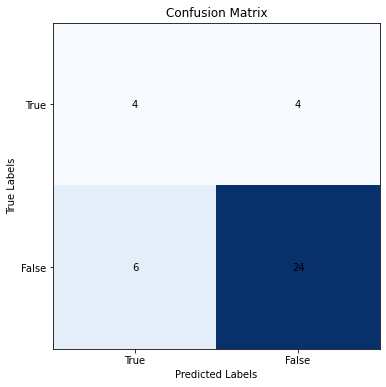

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues')
plt.xticks([0, 1], ['True', 'False'])
plt.yticks([0, 1], ['True', 'False'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Display the annotations on the heatmap
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

plt.show()

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, preds)
print("Recall:", recall)

Recall: 0.8
